# Задание 2

## Проверим Pandas
Скачать с Kaggle [данные с температурой по городам](https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities).

Если очень не хочется регистрироваться на сайте, архив *(2data.zip)* можно взять в папке с [заданием](https://disk.yandex.ru/d/MrtwhwSBdLuKKA).

In [1]:
import pandas as pd # type: ignore

Считать данные в `pandas.DataFrame`, посмотреть, что там лежит.

Если хотите вспомнить, как обращаться с DataFrame, могу порекомендовать [мини-курс](https://www.kaggle.com/code/residentmario/creating-reading-and-writing) на том же Kaggle:  там есть примеры всех нужных действий, сгруппированных на 6 страницах (считывание, обращение по индексу, изменение, типы данных).

In [2]:
import pandas as pd # type: ignore

df = pd.read_csv('city_temperature.csv', low_memory=False)

print(df.head())
print(df.info())

   Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB
None


Сколько записей имеют нулевое значение по полю State?

In [3]:
import pandas as pd # type: ignore

df = pd.read_csv('city_temperature.csv', low_memory=False)

null_count = df['State'].isna().sum()

print(f"Количество записей с нулевым значением в поле 'State': {null_count}")

Количество записей с нулевым значением в поле 'State': 1450990


Нужно сравнить выполнение операции над числами с плавающей точкой и над целыми числами. Для этого в DateFrame следует создать новый столбец, в который будут записаны значения температуры, умноженные на 10 и приведенные к *int*.

In [4]:
import pandas as pd # type: ignore
import time

df = pd.read_csv('city_temperature.csv', low_memory=False)

df['Temperature_int'] = (df['AvgTemperature'] * 10).astype(int)

print(df[['AvgTemperature', 'Temperature_int']].head())

print(df.info())

def test_operation(data):
    return data.sum()

start_time = time.time()
float_result = test_operation(df['AvgTemperature'])
float_time = time.time() - start_time

start_time = time.time()
int_result = test_operation(df['Temperature_int'])
int_time = time.time() - start_time

print(f"Время выполнения операции над числами с плавающей точкой: {float_time:.12f} секунд")
print(f"Время выполнения операции над целыми числами: {int_time:.12f} секунд")

   AvgTemperature  Temperature_int
0            64.2              642
1            49.4              494
2            48.8              488
3            46.4              464
4            47.9              479
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Region           object 
 1   Country          object 
 2   State            object 
 3   City             object 
 4   Month            int64  
 5   Day              int64  
 6   Year             int64  
 7   AvgTemperature   float64
 8   Temperature_int  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 199.6+ MB
None
Время выполнения операции над числами с плавающей точкой: 0.003010034561 секунд
Время выполнения операции над целыми числами: 0.001092195511 секунд


Замерить время исполнения операции с данными (например, подсчета среднего значения `mean()` для столбца).

Предлагаю использовать библиотеку **datetime**, но можете использовать любую другую.


In [5]:
import pandas as pd # type: ignore
import time

df = pd.read_csv('city_temperature.csv', low_memory=False)

df['Temperature_int'] = (df['AvgTemperature'] * 10).astype(int)

print(df[['AvgTemperature', 'Temperature_int']].head())

print(df.info())

def test_operation(data):
    return data.mean()

start_time = time.time()
float_result = test_operation(df['AvgTemperature'])
float_time = time.time() - start_time

start_time = time.time()
int_result = test_operation(df['Temperature_int'])
int_time = time.time() - start_time

print(f"Время выполнения операции над числами с плавающей точкой: {float_time:.12f} секунд")
print(f"Время выполнения операции над целыми числами: {int_time:.12f} секунд")

   AvgTemperature  Temperature_int
0            64.2              642
1            49.4              494
2            48.8              488
3            46.4              464
4            47.9              479
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Region           object 
 1   Country          object 
 2   State            object 
 3   City             object 
 4   Month            int64  
 5   Day              int64  
 6   Year             int64  
 7   AvgTemperature   float64
 8   Temperature_int  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 199.6+ MB
None
Время выполнения операции над числами с плавающей точкой: 0.005230665207 секунд
Время выполнения операции над целыми числами: 0.001923799515 секунд


## Проверка через numpy
Проверим то же самое для numpy массива. Для этого колонку `pd.Series` нужно привести к numpy массиву, явно указав тип данных. Для исходной температуры будет float64, для целочисленной - int16.

In [6]:
import numpy as np # type: ignore

In [7]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import timeit

df = pd.read_csv('city_temperature.csv', low_memory=False)

# Преобразование столбцов в numpy массивы с нужными типами данных
temp_float64 = df['AvgTemperature'].to_numpy(dtype=np.float64)
temp_int16 = (df['AvgTemperature'] * 10).astype(np.int16).to_numpy()

def test_operation_float64():
    return np.sum(temp_float64)

def test_operation_int16():
    return np.sum(temp_int16)

number_of_repeats = 100

float_time = timeit.timeit(test_operation_float64, number=number_of_repeats)
int_time = timeit.timeit(test_operation_int16, number=number_of_repeats)

print(f"Среднее время выполнения операции над массивом с типом float64: {float_time / number_of_repeats:.10f} секунд")
print(f"Среднее время выполнения операции над массивом с типом int16: {int_time / number_of_repeats:.10f} секунд")

Среднее время выполнения операции над массивом с типом float64: 0.0014006580 секунд
Среднее время выполнения операции над массивом с типом int16: 0.0014026980 секунд


Замерить время выполнения той же операции `mean()`.

In [8]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import timeit

df = pd.read_csv('city_temperature.csv', low_memory=False)

temp_float64 = df['AvgTemperature'].to_numpy(dtype=np.float64)
temp_int16 = (df['AvgTemperature'] * 10).astype(np.int16).to_numpy()

def test_operation_float64():
    return np.mean(temp_float64)

def test_operation_int16():
    return np.mean(temp_int16)

number_of_repeats = 100

float_time = timeit.timeit(test_operation_float64, number=number_of_repeats)
int_time = timeit.timeit(test_operation_int16, number=number_of_repeats)

print(f"Среднее время выполнения операции над массивом с типом float64: {float_time / number_of_repeats:.10f} секунд")
print(f"Среднее время выполнения операции над массивом с типом int16: {int_time / number_of_repeats:.10f} секунд")

Среднее время выполнения операции над массивом с типом float64: 0.0013440620 секунд
Среднее время выполнения операции над массивом с типом int16: 0.0020214260 секунд


# Задание 4

In [9]:
from PIL import Image # type: ignore

Загружаем изображение

In [10]:
im = Image.open('pic.jpg')
im.size

(1147, 642)

In [11]:
import matplotlib.pyplot as plt # type: ignore

Посмотрим, что загрузилось

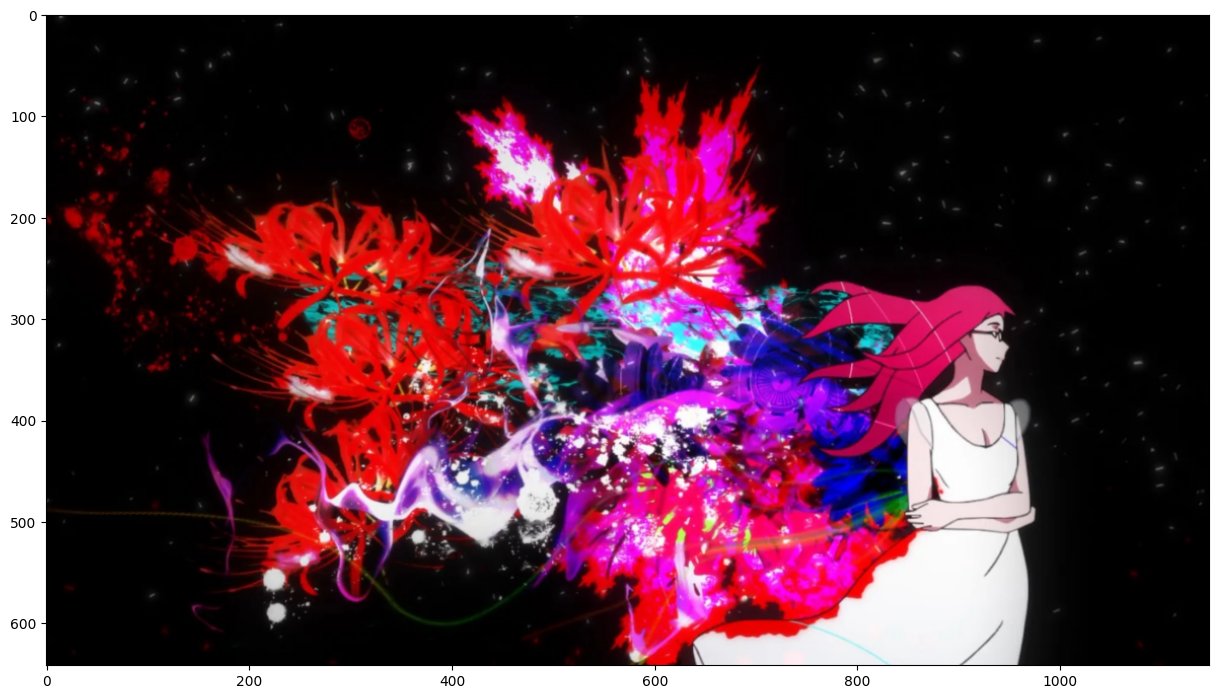

In [12]:
plt.figure(figsize=(15.,10.))
plt.imshow(im)

Переводим в трехмерный numpy массив (x, y, цвет).

In [13]:
import numpy as np # type: ignore
a = np.asarray(im)
a[500:505, 495:500]

array([[[151, 146, 150, 255],
        [103,  98, 102, 255],
        [ 63,  58,  64, 255],
        [ 48,  42,  48, 255],
        [ 35,  28,  36, 255]],

       [[169, 164, 168, 255],
        [117, 112, 116, 255],
        [ 90,  83,  90, 255],
        [ 73,  66,  73, 255],
        [ 43,  34,  42, 255]],

       [[144, 139, 143, 255],
        [115, 110, 114, 255],
        [103,  97, 101, 255],
        [ 82,  76,  82, 255],
        [ 52,  43,  51, 255]],

       [[ 97,  92,  96, 255],
        [ 87,  82,  86, 255],
        [ 78,  72,  76, 255],
        [ 72,  66,  71, 255],
        [ 80,  71,  78, 255]],

       [[124, 120, 123, 255],
        [124, 119, 123, 255],
        [113, 109, 114, 255],
        [105,  99, 106, 255],
        [136, 127, 135, 255]]], dtype=uint8)

Найдем фрагменты изображения, с нужным нам наличием/отсутствием цвета.

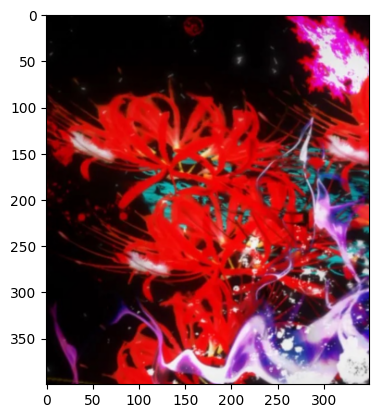

In [14]:
plt.imshow(a[100:500, 150:500])

**Красное:**

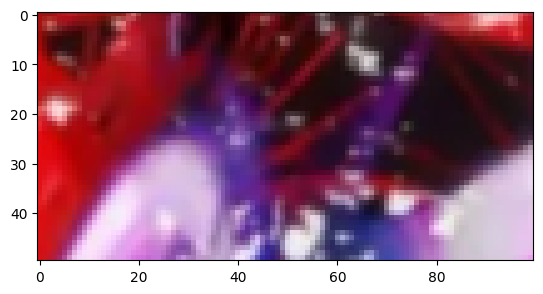

In [15]:
plt.imshow(a[400:450, 350:450])

**Не красное:**

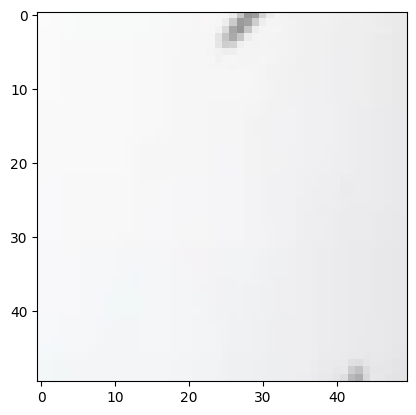

In [16]:
from PIL import Image # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore

im = Image.open('pic.jpg')
im.size

a = np.asarray(im)


plt.imshow(a[550:600, 900:950])



Подготовка набора данных для обучения.

Желательно, чередовать положительные и отрицательные примеры, при добавлении их в общий массив:

~~y = [0,0,0,1,1,1]~~

`y  = [0,1,0,1,0,1]`.

Должно получиться следующее (*для нейронки с 3-мя входами и одним выходом*):

|x_R|x_G|x_B|y_Target|
|---|---|---|---|
|255|255|0|1|
|0|0|255|0|



          R  G  B  our color
0       206  0  1          1
1       207  0  2          1
2       206  0  0          1
3       207  0  1          1
4       206  0  0          1
...     ... .. ..        ...
736369    0  0  0          0
736370    0  0  0          0
736371    0  0  0          0
736372    0  0  0          0
736373    0  0  0          0

[736374 rows x 4 columns]
          R    G    B  our color
0        10   10   10          0
1       153   16  228          0
2       248  246  249          0
3        11   14   16          0
4         7    0    0          0
...     ...  ...  ...        ...
736369   16    4    2          0
736370  163   74  100          0
736371    4    3    0          0
736372    0    0    0          0
736373  248  244  245          0

[736374 rows x 4 columns]
Positives: True
Negatives: True


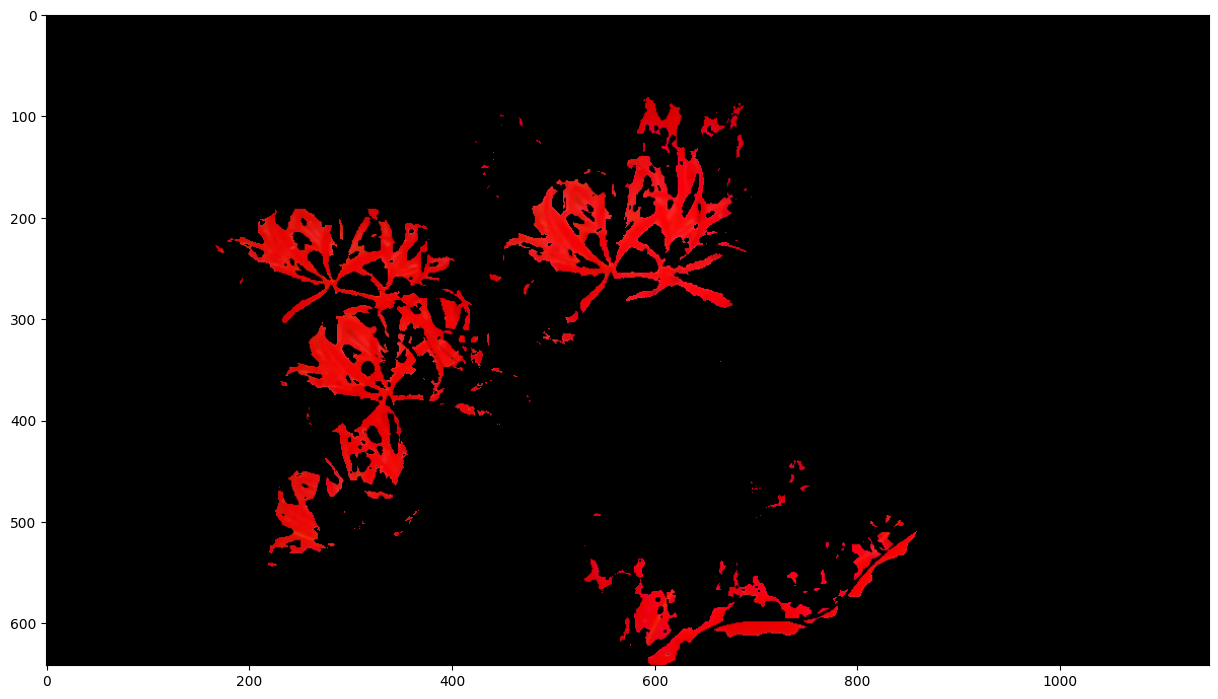

In [17]:
image = Image.open('pic.jpg')
pixel_colors = np.array(image)

# Если изображение в формате RGBA, то берем только RGB
if pixel_colors.shape[2] == 4:
    pixel_colors = pixel_colors[:, :, :3]

target_color = np.array([255, 0, 0])

def is_target_color(color):
    return np.all(np.abs(color - target_color) < 50)

mask_target_color = np.array([[is_target_color(color) for color in row] for row in pixel_colors])
pixels_with_target_color = pixel_colors[mask_target_color]
pixels_without_target_color = pixel_colors[~mask_target_color]

# Создаем копию изображения. Отмечаем пиксели, соответствующие целевому цвету, остальные делаем черными
output_image = np.zeros_like(pixel_colors)
output_image[mask_target_color] = pixel_colors[mask_target_color]
output_image = Image.fromarray(output_image.astype('uint8'))
output_image.save('output_image.jpg')

# Создание датасета для обучения
df_with_target_color = pd.DataFrame(pixels_with_target_color.reshape(-1, 3), columns=['R', 'G', 'B'])
df_with_target_color['our color'] = 1

df_without_target_color = pd.DataFrame(pixels_without_target_color.reshape(-1, 3), columns=['R', 'G', 'B'])
df_without_target_color['our color'] = 0

training_data = pd.concat([df_with_target_color, df_without_target_color], ignore_index=True)

# Перетасовка датасета
shuffled_training_data = training_data.sample(frac=1).reset_index(drop=True)

print(training_data)
print(shuffled_training_data)

positive = np.any(shuffled_training_data['our color'] == 1)
negative = np.any(shuffled_training_data['our color'] == 0)

print("Positives:", positive)
print("Negatives:", negative)

plt.figure(figsize=(15.,10.))
plt.imshow(output_image)


Делим данные на обучающую и тестовую выборки вручную **(без использования библиотеки sklearn)**.

Самый простой вариант: каждый **n**-й набор уходит в тестовую выборку.

Проверить, что и в обучающей и в тестовой выборке есть как положительные, так и отрицательные примеры.

In [18]:
n = 5  # каждый n-й элемент будет в тестовой выборке

# Создание индексов
indices = np.arange(len(shuffled_training_data))

# Разделение индексов
test_indices = indices[::n]  # выбираем каждый n-й индекс
train_indices = np.delete(indices, test_indices)  # остальные индексы для обучающей выборки

train_data = shuffled_training_data.iloc[train_indices]
test_data = shuffled_training_data.iloc[test_indices]

train_positive = np.any(train_data['our color'] == 1)
train_negative = np.any(train_data['our color'] == 0)
test_positive = np.any(test_data['our color'] == 1)
test_negative = np.any(test_data['our color'] == 0)

print("Train data:\n", train_data)
print("Test data:\n", test_data)

print("Train has positives:", train_positive)
print("Train has negatives:", train_negative)
print("Test has positives:", test_positive)
print("Test has negatives:", test_negative)


Train data:
           R    G    B  our color
1       153   16  228          0
2       248  246  249          0
3        11   14   16          0
4         7    0    0          0
6         0    0    0          0
...     ...  ...  ...        ...
736368   78   12   15          0
736369   16    4    2          0
736371    4    3    0          0
736372    0    0    0          0
736373  248  244  245          0

[589099 rows x 4 columns]
Test data:
           R   G    B  our color
0        10  10   10          0
5       235   3   13          1
10        0   0    0          0
15        1   0    1          0
20        2   2    2          0
...     ...  ..  ...        ...
736350   15  15   15          0
736355   24   1    0          0
736360   14  14   14          0
736365   12   1    3          0
736370  163  74  100          0

[147275 rows x 4 columns]
Train has positives: True
Train has negatives: True
Test has positives: True
Test has negatives: True


Обучение, оценка результатов

*Это происходит в лабе по другому предмету; когда будет готово, можно будет импортировать код библиотекой, подрубить класс нейронки и проверить, как она работает* :)

In [19]:
import warnings
from neural_network import create_neural_network, train_neural_network, split_data, evaluate_neural_network

warnings.filterwarnings("ignore")

shuffled_training_data_array = np.array(shuffled_training_data[['R', 'G', 'B']])
print(shuffled_training_data_array)
target_labels = np.array(shuffled_training_data['our color'])

train_data, test_data = split_data(list(zip(shuffled_training_data_array, target_labels)), train_fraction=0.8)

neural_net = create_neural_network(1, 3)

print(neural_net.neurons[0].get_weights())

evaluate_neural_network(neural_net, test_data)
evaluate_neural_network(neural_net, train_data)

train_neural_network(neural_net, train_data, learning_rate=0.001, epochs=10)

evaluate_neural_network(neural_net, test_data)
evaluate_neural_network(neural_net, train_data)

[[ 10  10  10]
 [153  16 228]
 [248 246 249]
 ...
 [  4   3   0]
 [  0   0   0]
 [248 244 245]]
(array([-0.71917773, -0.67543779, -0.53465902]), 1.1555869999262957e-06)
Accuracy: 94.28%
Accuracy: 94.12%
Accuracy: 94.28%
Accuracy: 94.12%
